Original image size:  (256, 256)


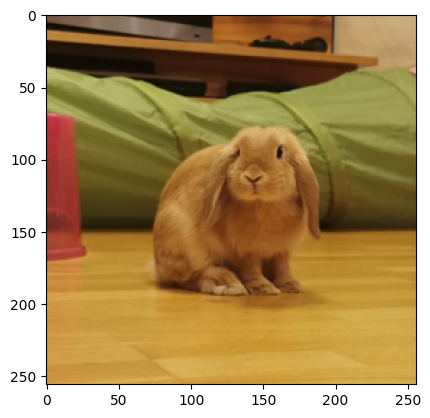

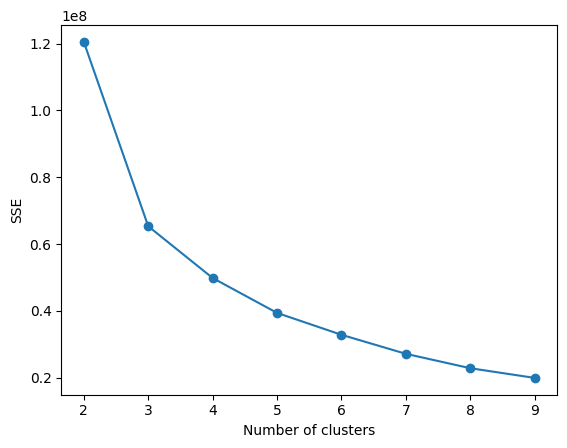

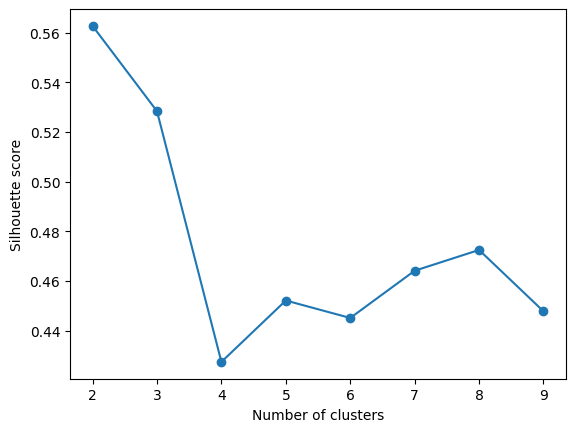

In [22]:
from PIL import Image
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
IMAGE = "Lecture_07_willy.png"
SIZE = (256, 256)
img = Image.open(IMAGE)
img = img.resize(SIZE)
print("Original image size: ", img.size)
plt.imshow(img)
plt.show()
# now in order to use the image we have to convert it to a numpy array
img_array = np.array(img)
pixels = img_array.reshape((-1, 3))
k_list = np.arange(2, 20, 1)
k_list = np.arange(2, 10, 1)
sse = list()
silhouette_scores = list()
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(pixels)
    sse.append(kmeans.inertia_)
    sil_score = silhouette_score(pixels, kmeans.labels_)
    silhouette_scores.append(sil_score)
    
plt.plot(k_list, sse, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.xticks(k_list)
plt.show()
plt.plot(k_list, silhouette_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.xticks(k_list)
plt.show()

Original Image


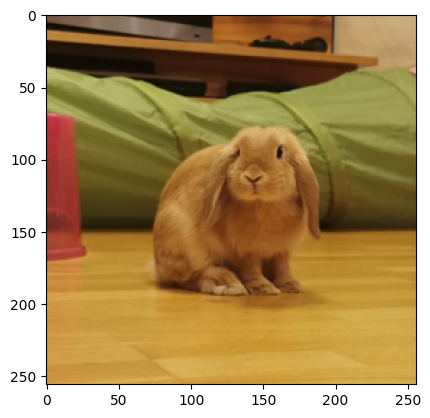

new image with k = 8


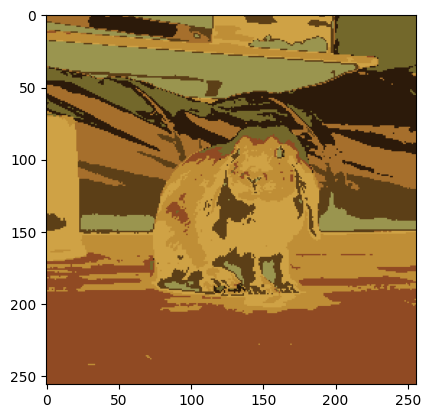

In [23]:
BEST_K = 8
km = KMeans(n_clusters=BEST_K, random_state=42, n_init=10).fit(pixels)
labels = km.labels_
labels = labels.reshape(SIZE)
new_pixels = kmeans.cluster_centers_[labels]
new_img = Image.fromarray(new_pixels.astype(np.uint8), mode="RGB")
# show the old image
plt.imshow(img)
print("Original Image")
plt.show()
# show the new image
plt.imshow(new_img)
print("new image with k = "+str(BEST_K))    
plt.show()